In [108]:
import numpy as np
from video_processing import VideoProcessor

In [109]:
file_path = "rec.mp4"


In [116]:
processor = VideoProcessor(file_path, 'frames')
fps, width, height, channels, image = processor.get_deets()
image = image.mean(axis=2).astype(int)

In [111]:
# resize image to size//8
def resize(image, multiplier=8):
    return image[::multiplier, ::multiplier]

In [112]:
import PIL.Image

In [113]:
# open circle.jpg image as numpy array
image = PIL.Image.open("circle.jpg")
image = np.array(image)
image = image.mean(axis=2).astype(int)

In [117]:
image.shape

(1080, 1920)

In [118]:
image = resize(image, multiplier=4)

In [119]:
import matplotlib.pyplot as plt

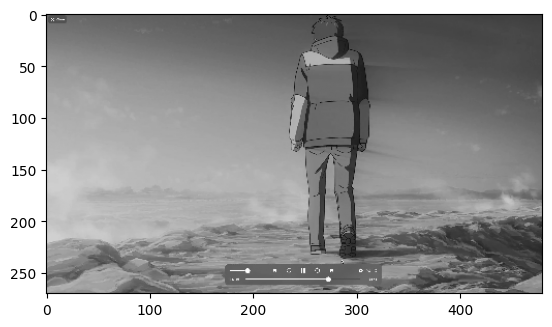

In [120]:
plt.imshow(image, cmap='gray')

In [121]:
image.shape

(270, 480)

In [122]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [123]:
def convolve(image, kernel):
    output = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            output[i, j] = (image[i-1:i+2, j-1:j+2] * kernel).sum()
    return output

In [124]:
result_x = convolve(image, sobel_x)
result_y = convolve(image, sobel_y)

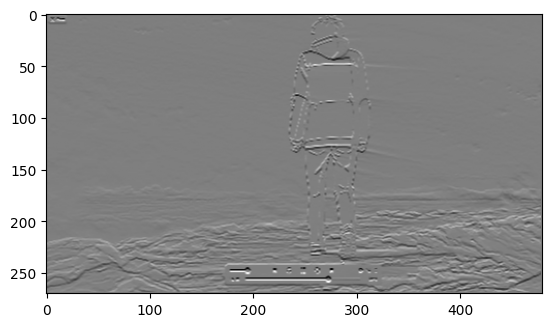

In [125]:
# plto result x
plt.imshow(result_y, cmap='gray')
# plt.imshow(result_x, cmap='Greens', alpha=0.5)
plt.show()

In [126]:
angles = np.arctan2(result_x, result_y)

In [127]:
scaled_angles = angles * 180 / np.pi 

In [128]:
scaled_angles.min(), scaled_angles.max()

(np.float64(-179.91033531652636), np.float64(180.0))

In [129]:
PIL.Image.fromarray(scaled_angles.astype(np.uint8)).save("angles.jpg")

In [130]:
bin_edges = np.array([-181, -135, -90, -45, 0, 45, 90, 135, 181])

In [144]:
mapping = {
    1: "／",
    2: "｜",
    3: "／",
    4: "－",
    5: "－",
    6: "／",
    7: "｜",
    8: "／"
}

In [145]:
bin_indices = np.digitize(scaled_angles, bin_edges)

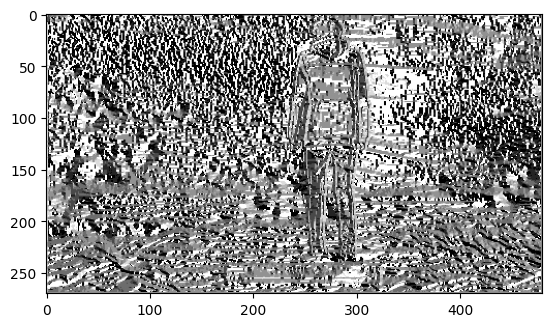

In [146]:
plt.imshow(bin_indices, cmap='gray')

(array([26405., 14433.,  7784.,     0., 13173., 21271.,     0.,  6201.,
         6846., 33487.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

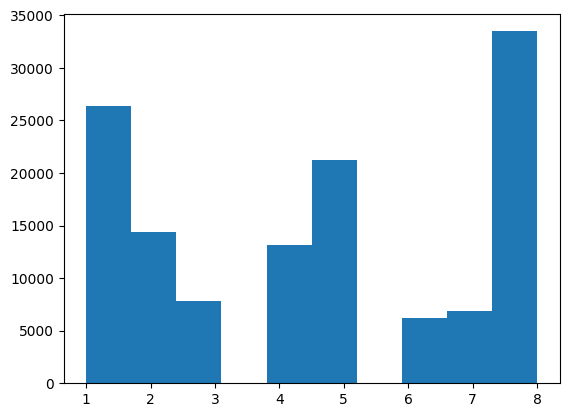

In [147]:
plt.hist(bin_indices.flatten())

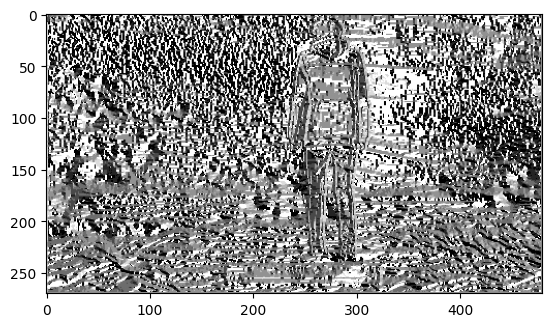

In [148]:
plt.imshow(bin_indices, cmap='gray')    

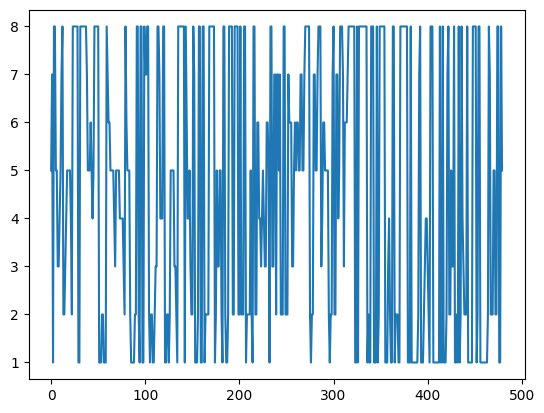

In [154]:
plt.plot(bin_indices[100, :])

In [150]:
from collections import Counter

In [151]:
def local_hist(grid):
    c = Counter(grid.flatten())
    keys = list(dict(c).keys())
    # if 5 in keys: keys.remove(5)
    if not keys: return None, None
    keys.sort(key=lambda x: c[x], reverse=True)
    return keys[0], c[keys[0]]

In [152]:
text = []
rows = len(bin_indices)
cols = len(bin_indices[0])
for i in range(8, rows, 8):
    curr = []
    for j in range(8, cols, 8):
        square = bin_indices[i-8:i, j-8:j]
        max_index, count = local_hist(square)
        if max_index is None: 
            curr.append(" ")
        else:
            curr.append(mapping[max_index])
    text.append(curr)


In [153]:
for row in text:
    for i in row:
        print(i, end="")
    print()

－－－／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／－－－－－－－－－－－－－－／／／／／／／／／／／／
／／／／／／／／／／／／／／／／／／／／／－／／／／／／／／／／／－／｜／／／／／／／／－／－－－－－－／／／／／／／
／／／／／／／／／／／／／／／／／／／／／／／／／／／／｜／／｜／－－／／／／／／／｜／／／／／／－－－－－－－｜｜｜
／／／／／／／／／／／／／／／／／／／／／／／／／／｜／／／／／／／／｜－／－／－－－｜－／－／／／／／／／／／｜－－
／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／｜／／／／／／／／／－－／／｜／／｜／／／／｜／
／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／－｜／／／／／／－
／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／－－－－－－／／／－／／／－／／／／／／／／－／－｜｜
／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／｜／－－－－－｜／／／／／／／／／／／／／／／／／／／／／
／／／／／／／／／／／／／／／／／／／／／／／／／／／／／／－／－－／／／｜／／／／／／／／／／／／／／／／／／／／／
／／／／／／／｜｜／／／／／／／／／／／／／／／／／／／／／／／－－－－－／／｜／／／／／／／／／／／／／／／／／／／
－｜／｜｜／／／／／／／／／／／／／／／／／／／／／／／／／／／－－－－｜／／／／／／／／／／／／／／／／／／／／／－
／／－／／－／／／／／／／／／／／／／／／／／／／／／／／｜－／｜／／／／｜／／／／／／／／／／／／／／／／／／／｜／
－｜／／／／／／－／｜｜／／／／－／｜／／／／／／／／／／／／｜－－－－－｜｜／／／／／／／／／／／／／／｜／／／／｜
－／／／／－｜／／｜／｜－／／／／／／／／／／／／－－／／／／｜／－－－－／／／／／／／／／／／／／／／／／／／／／／
－／／／／／／／／－／｜／／／／／／／／／／／／／／／／／｜／／－－／－－／｜｜／／／／／／／／／／／／／／／／／／／
｜／｜／／／／／－－－／／｜／／／／／／｜／／／／／／／／｜／｜／－－－－／／－／－／／／／／｜／／／／／／／／／｜／
／－／／／／／／／／／／／｜－／／／／／／／／／／／／／／／／｜／／／／／／／－